# Visualizing the Galactic Model Data

The purpose of this notebook is to demonstrate how to load and plot the Trilegal galactic model data produced by calculate_stellar_density.py.

In [13]:
from os import path
import json
from astropy import units as u 
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord 
%matplotlib inline

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The JSON file contains the stellar density data in the form of a set of HEALpixel skymap arrays, one for each filter, prism and grism.  The densities are given in log10 form. 

In [14]:
file_path = path.join(root_dir, 'trilegal_model_data', 'trilegal_nir_stellar_density.json')
with open(file_path, 'r') as f:
    trilegal_data = json.load(f)

trilegal_data

{'label': 'Trilegal_v1.6_log10_density',
 'nside': 64,
 'healpix_resolution_deg': 0.8392936452111668,
 'n_healpix': 49152,
 'healpix_map_F087': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

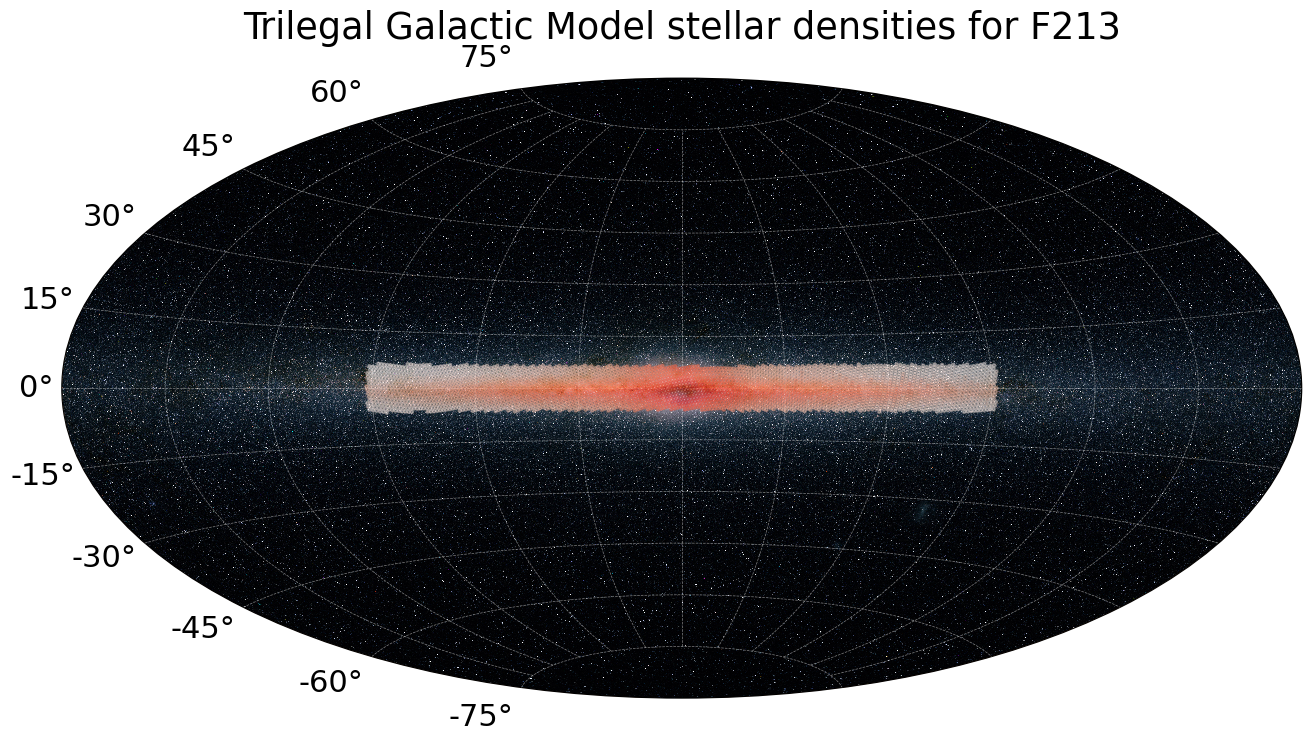

In [15]:
optic = 'F213'

map = np.array(trilegal_data['healpix_map_'+optic])

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='infrared', figsize=(16,10))
mw1.title = 'Trilegal Galactic Model stellar densities for ' + optic
proj = HEALPix(nside=trilegal_data['nside'], order='ring', frame='icrs')
pixels = np.where(map > 0)[0]
s = proj.healpix_to_skycoord(pixels)
mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, 
            c=map[pixels], 
            cmap='Reds', s=5, alpha=0.4)
plt.rcParams.update({'font.size': 22})

plt.show()